<a href="https://colab.research.google.com/github/PedroArroyoCruz/PedroArroyoCruz/blob/main/RISCO_DE_CR%C3%89DIT%7CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANDO BIBLIOTECA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statistics as stat
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
!pip install pyod
from  pyod.models.knn import KNN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.regressor import ResidualsPlot
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold
import scipy
import scipy.stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
!pip install scikit-posthocs
import scikit_posthocs as sp
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import datetime as dt
import random
from sklearn.metrics import roc_auc_score
!pip install  geneticalgorithm
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#OVD_t1 ==> número de vezes do vencimento tipo 1 ==> discreta
#OVD_t2 ==> número de vezes do vencimento tipo 2 ==> discreta
#OVD_t3 ==> número de vezes do vencimento tipo 3 ==> discreta
#OVD_sum ==> total de dias vencidos ==> discretas
#paynormal ==> número de vezes que o pgmt foi efetuado normal ==> discreta
#prod_code ==> código do produto do crédito ==> nominal
#prod_limit ==> limite do produto do crédito ==> contínua
#update_date ==> data de atualização da conta ==> 'discreta-ano'
#new_balance ==> saldo atual do produto ==> contínua
#highestbalance ==> maior balanço da história ==> contínua
#report_date ==> data do pagamento recentte ==>'discreta-ano'

In [5]:
df_customer_data = pd.read_csv('/content/customer_data.csv', sep=',')
df_payment_data = pd.read_csv('/content/payment_data.csv', sep=',')
df_customer_data

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [6]:
df_payment_data

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58995478,0,0,0,0,9,15,NaN,NaN,0.0,NaN,NaN
8246,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN
8247,54988209,0,0,0,0,5,13,NaN,NaN,20654.4,33315.0,NaN
8248,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN


In [7]:
df = pd.merge(df_payment_data,df_customer_data ,on='id', how='outer',indicator=True )
df

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,...,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,_merge
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,...,3,62000.0,2,15,9,95,4,60023,1.0,both
1,58987402,0,0,0,0,1,0,NaN,04/10/2016,42000.0,...,3,62000.0,2,15,9,95,4,60023,1.0,both
2,58987402,0,0,0,0,2,10,113300.0,13/02/2016,7938.0,...,3,62000.0,2,15,9,95,4,60023,1.0,both
3,58987402,0,0,0,0,9,10,NaN,27/07/2015,30039.6,...,3,62000.0,2,15,9,95,4,60023,1.0,both
4,58987402,0,0,0,0,1,0,NaN,07/12/2011,0.0,...,3,62000.0,2,15,9,95,4,60023,1.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58982397,1,0,0,30,34,10,NaN,13/01/2006,0.0,...,1,500000.0,2,4,9,105,5,650005,1.0,both
8246,58982397,0,0,0,0,1,10,NaN,20/12/2004,-1.2,...,1,500000.0,2,4,9,105,5,650005,1.0,both
8247,58982397,0,0,0,0,23,10,205700.0,06/05/2004,0.0,...,1,500000.0,2,4,9,105,5,650005,1.0,both
8248,58982397,0,0,0,0,3,10,NaN,25/10/2003,0.0,...,1,500000.0,2,4,9,105,5,650005,1.0,both


In [8]:
df.describe()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance,...,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,2132.000000,8.250000e+03,7.841000e+03,...,7222.000000,8250.000000,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000
mean,5.782173e+07,0.249091,0.127152,0.369212,187.681697,14.526667,8.232000,85789.702205,1.054042e+05,2.192027e+05,...,1286.156813,2.319636,1.386712e+05,1.940848,11.013939,4.881091,100.026303,4.245333,188575.384848,153.030672
std,1.822724e+06,1.250197,0.860046,2.900320,1804.232570,12.053627,3.533055,74345.828184,1.887704e+06,2.814536e+06,...,52.002429,0.887414,1.081565e+05,0.235922,2.694611,3.031902,12.540081,0.876647,167030.877718,122.082517
min,5.498235e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,-4.030320e+04,5.010000e+02,...,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,5.499050e+07,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,37400.000000,0.000000e+00,2.345300e+04,...,1248.500000,1.000000,7.700000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60047.000000,1.000000
50%,5.898905e+07,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,68200.000000,0.000000e+00,4.404700e+04,...,1283.000000,3.000000,1.110000e+05,2.000000,11.000000,5.000000,105.000000,5.000000,72000.000000,184.724119
75%,5.899655e+07,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,112200.000000,2.494800e+04,1.005000e+05,...,1317.500000,3.000000,1.510000e+05,2.000000,12.000000,5.000000,110.000000,5.000000,350020.000000,220.227156
max,5.900624e+07,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,660000.000000,1.632120e+08,1.800005e+08,...,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [9]:
df["label"].value_counts()

0    6863
1    1387
Name: label, dtype: int64

In [10]:
porcentagem_1 =df["label"].value_counts()[1]/(df["label"].value_counts()[0]+df["label"].value_counts()[1])
porcentagem_1, 1-porcentagem_1

(0.16812121212121212, 0.8318787878787879)

In [11]:
df.isnull().sum()

id                    0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
label                 0
fea_1                 0
fea_2              1028
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
_merge                0
dtype: int64

In [12]:
6118/8250, 26/8250,  409/8250, 1114/8250, 1028/8250

(0.7415757575757576,
 0.0031515151515151517,
 0.04957575757575758,
 0.13503030303030303,
 0.12460606060606061)

Excluindo a variável prod_limit por possuir 74% dos dados faltantes

In [13]:
df =df.drop(columns=['prod_limit'])

Avaliando a variável report date

In [14]:
df['report_date'] = pd.to_datetime(df['report_date'], format="%d/%m/%Y")
df['update_date'] = pd.to_datetime(df['update_date'], format="%d/%m/%Y")

In [15]:
lst_date = []
lst_qui_date = []
lst_s_date = []
for c,i in enumerate(df['report_date']):
  if type(i) != type(df['report_date'][0]):
    lst_date.append(df.loc[c,'label'])
    lst_qui_date.append(1)
  else:
    lst_s_date.append(df.loc[c,'label'])
    lst_qui_date.append(0)       
print(np.mean(lst_date), np.mean(lst_s_date))

0.16746076233183857 0.17235188509874327


In [16]:
df['report_date'] = df['report_date'].dt.year
df['update_date']= df['update_date'].dt.year

In [17]:
ctab_date = pd.crosstab(np.transpose(lst_qui_date),df['label'])
qui_date = stats.chi2_contingency(ctab_date)

In [18]:
ctab_date

label,0,1
row_0,,
0,922,192
1,5941,1195


In [19]:
print('p-valor',qui_date[1], '> 0.05')

p-valor 0.7166689472479058 > 0.05


Os dados nulos da variável 'report_date' não possuem relevância com a variável resposta 'label', portanto pode-se excluir esses dados nulos

In [20]:
df.dropna(subset = ['report_date'], inplace=True)

Avaliando a variável fea_2

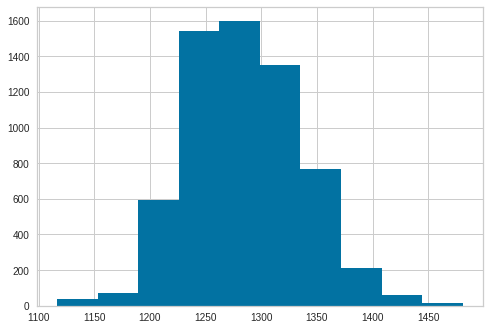

In [21]:
plt.hist(df['fea_2'])
plt.show()

In [22]:
mediana_fea_2 = df.fea_2.median()

In [23]:
media_fea_2 = df.fea_2.mean()

In [24]:
print('mediana fea_2:',mediana_fea_2,'\nmedia fea_2:', media_fea_2 )

mediana fea_2: 1281.5 
media fea_2: 1284.4863112391931


Provavelmente os dados são normais,pela vizualização do histograma. Como os dados são aparentemente normais e simétrico, e a mediana e a media são aproximadamente iguais, substituir os valores nulos da coluana 'fea_2' pela média da coluna 'fea_2'

In [25]:
df["fea_2"].fillna(np.mean(df['fea_2']), inplace=True)

In [26]:
df.isnull().sum()

id                   0
OVD_t1               0
OVD_t2               0
OVD_t3               0
OVD_sum              0
pay_normal           0
prod_code            0
update_date          2
new_balance          0
highest_balance    145
report_date          0
label                0
fea_1                0
fea_2                0
fea_3                0
fea_4                0
fea_5                0
fea_6                0
fea_7                0
fea_8                0
fea_9                0
fea_10               0
fea_11               0
_merge               0
dtype: int64

Excluindo os valores nulos da variável 'highest_balance', por representarem apenas 5% da própria coluna

In [27]:
df.dropna(subset = ['highest_balance'], inplace = True)
df.dropna(subset = ['update_date'], inplace = True)

In [28]:
df.isnull().sum()

id                 0
OVD_t1             0
OVD_t2             0
OVD_t3             0
OVD_sum            0
pay_normal         0
prod_code          0
update_date        0
new_balance        0
highest_balance    0
report_date        0
label              0
fea_1              0
fea_2              0
fea_3              0
fea_4              0
fea_5              0
fea_6              0
fea_7              0
fea_8              0
fea_9              0
fea_10             0
fea_11             0
_merge             0
dtype: int64

Seleção das variáveis que irão compor o modelo através de testes estatísticos;
1 passo: Divisão da base de dados, treino e teste
;2 passo: normalização/padronização dos dados de treino
;3 passo: testes específicos de acordo com o tipo da variável dependente e independente

Treino e Teste do Dataframe

In [29]:
x_train,x_teste, y_train, y_teste = train_test_split(df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22]], df.iloc[:,11], test_size = 0.3, random_state=0)

In [30]:
x_train

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,update_date,new_balance,highest_balance,...,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
2955,58990628,0,0,0,0,28,10,2013.0,0.0,8915.0,...,1335.5,3,150000.0,2,11,9,105,5,350050,412.310563
7857,58999263,4,0,0,4,18,8,2006.0,0.0,400500.0,...,1317.5,3,81000.0,2,8,5,90,5,60038,1.000000
6807,58985063,0,0,0,0,15,13,2014.0,31285.2,63500.0,...,1215.5,3,94000.0,2,15,-1,86,5,550088,223.606798
7594,58997888,0,0,0,0,34,10,2007.0,0.0,33446.0,...,1352.0,3,175000.0,2,8,9,105,5,60004,219.089023
6629,54982530,0,0,0,0,25,10,2013.0,4371.6,14955.0,...,1272.5,3,120000.0,1,15,5,110,5,72000,187.082869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,58997555,0,0,0,0,1,10,2006.0,0.0,12665.0,...,1266.5,3,207000.0,2,9,5,100,1,71002,316.227766
3942,58987900,0,0,0,0,23,10,2014.0,6760.8,35516.0,...,1248.5,1,81000.0,2,15,9,79,3,450033,187.082869
2048,58986950,0,0,0,0,30,1,2013.0,463197.6,664500.0,...,1308.5,3,131000.0,1,15,5,110,5,72000,1.000000
3145,58998876,0,0,0,0,35,2,2012.0,707304.0,800500.0,...,1245.5,3,87000.0,2,8,5,112,5,60033,222.132843


In [31]:
x_teste

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,update_date,new_balance,highest_balance,...,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
6268,58990030,0,0,0,0,36,10,2011.0,1150.8,59152.0,...,1326.500000,3,96000.0,2,11,5,113,4,591001,1.000000
1778,58993948,0,0,0,0,2,10,2016.0,15718.8,13598.0,...,1241.000000,3,63000.0,2,11,5,112,4,60057,1.000000
182,58992344,0,0,0,0,10,6,2015.0,0.0,23000.0,...,1296.500000,3,80000.0,2,11,5,112,3,60069,1.000000
3447,58991395,0,0,0,0,6,19,2007.0,0.0,254100.0,...,1299.500000,1,87000.0,2,11,5,85,5,151300,1.000000
5293,58983266,0,0,0,0,1,0,2013.0,0.0,110500.0,...,1209.500000,3,35000.0,2,15,5,78,5,71000,227.015418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,58998166,0,0,0,0,17,5,2007.0,0.0,40500.0,...,1355.000000,3,177000.0,2,8,5,87,5,151101,1.000000
6773,58988697,0,0,0,0,0,6,2013.0,0.0,26680.0,...,1284.486311,2,50000.0,2,11,5,112,5,72000,181.554400
4080,54986167,0,0,0,0,10,1,2015.0,565808.4,535500.0,...,1256.000000,3,130000.0,1,11,9,105,5,60058,187.082869
6925,58983376,0,0,0,0,27,10,2013.0,-3.6,7500.0,...,1272.500000,3,49000.0,2,15,-1,86,5,330004,200.000000


Padronização dos dados de treino

In [32]:
obj_scaler = StandardScaler()
x_train_modelagem = x_train
for i in x_train.columns:
  obj_scaler.fit(x_train_modelagem[i].values.reshape(-1,1))
  x_train_modelagem[i] = (obj_scaler.transform(x_train_modelagem[i].values.reshape(-1,1)))
x_train_modelagem = x_train_modelagem.reset_index(drop=True)
x_train_modelagem 

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,update_date,new_balance,highest_balance,...,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,0.636001,-0.192150,-0.149625,-0.132069,-0.108723,1.003712,0.527890,0.347977,-0.049478,-0.068431,...,1.051831,0.768049,0.119086,0.253322,-0.005416,1.337679,0.389701,0.879187,0.979306,2.142633
1,0.640756,2.729369,-0.149625,-0.132069,-0.106580,0.167869,-0.057963,-1.690361,-0.049478,0.061074,...,0.678867,0.768049,-0.532367,0.253322,-1.125016,0.026731,-0.815317,0.879187,-0.763123,-1.245917
2,0.632937,-0.192150,-0.149625,-0.132069,-0.108723,-0.082884,1.406669,0.639168,-0.036498,-0.050379,...,-1.434595,0.768049,-0.409630,0.253322,1.487383,-1.939691,-1.136655,0.879187,2.181161,0.588011
3,0.639998,-0.192150,-0.149625,-0.132069,-0.108723,1.505217,0.527890,-1.399170,-0.049478,-0.060318,...,1.393714,0.768049,0.355120,0.253322,-1.125016,1.337679,0.389701,0.879187,-0.763327,0.550792
4,-1.570865,-0.192150,-0.149625,-0.132069,-0.108723,0.752959,0.527890,0.347977,-0.047664,-0.066434,...,-0.253543,0.768049,-0.164155,-3.947537,1.487383,0.026731,0.791374,0.879187,-0.691254,0.287112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,0.639815,-0.192150,-0.149625,-0.132069,-0.108723,-1.253063,0.527890,-1.690361,-0.049478,-0.067191,...,-0.377864,0.768049,0.657244,0.253322,-0.751816,0.026731,-0.011971,-3.707305,-0.697250,1.351062
4888,0.634499,-0.192150,-0.149625,-0.132069,-0.108723,0.585790,0.527890,0.639168,-0.046673,-0.059634,...,-0.750828,-1.491979,-0.532367,0.253322,1.487383,1.337679,-1.698996,-1.414059,1.580017,0.287112
4889,0.633976,-0.192150,-0.149625,-0.132069,-0.108723,1.170880,-2.108447,0.347977,0.142709,0.148385,...,0.492385,0.768049,-0.060300,-3.947537,1.487383,0.026731,0.791374,0.879187,-0.691254,-1.245917
4890,0.640542,-0.192150,-0.149625,-0.132069,-0.108723,1.588802,-1.815520,0.056786,0.243992,0.193363,...,-0.812988,0.768049,-0.475719,0.253322,-1.125016,0.026731,0.952043,0.879187,-0.763153,0.575868


Padronização dos dados de teste, com as métricas dos dados de treino

In [33]:
x_teste_modelagem = x_teste
for i in x_teste.columns:
  x_teste_modelagem[i] = (obj_scaler.transform(x_teste_modelagem[i].values.reshape(-1,1)))
x_teste_modelagem

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,update_date,new_balance,highest_balance,...,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
6268,485983.499392,-1.254156,-1.254156,-1.254156,-1.254156,-0.957573,-1.171772,15.313311,8.226620,486.064975,...,9.674111,-1.229441,789.634344,-1.237679,-1.163533,-1.212964,-0.323214,-1.221202,4867.661411,-1.245917
1778,486015.777529,-1.254156,-1.254156,-1.254156,-1.254156,-1.237679,-1.171772,15.354503,128.243950,110.771905,...,8.969726,-1.229441,517.766422,-1.237679,-1.163533,-1.212964,-0.331453,-1.221202,493.520747,-1.245917
182,486002.563100,-1.254156,-1.254156,-1.254156,-1.254156,-1.171772,-1.204725,15.346264,-1.254156,188.229547,...,9.426958,-1.229441,657.819594,-1.237679,-1.163533,-1.212964,-0.331453,-1.229441,493.619608,-1.245917
3447,485994.744838,-1.254156,-1.254156,-1.254156,-1.254156,-1.204725,-1.097626,15.280357,-1.254156,2092.128843,...,9.451673,-1.245917,715.488547,-1.237679,-1.163533,-1.212964,-0.553890,-1.212964,1245.219074,-1.245917
5293,485927.774707,-1.254156,-1.254156,-1.254156,-1.254156,-1.245917,-1.254156,15.329787,-1.254156,909.091461,...,8.710215,-1.229441,287.090610,-1.237679,-1.130579,-1.212964,-0.611559,-1.212964,583.673797,0.616093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,486050.527193,-1.254156,-1.254156,-1.254156,-1.254156,-1.114103,-1.212964,15.280357,-1.254156,332.401930,...,9.908906,-1.229441,1456.946516,-1.237679,-1.188248,-1.212964,-0.537413,-1.212964,1243.579628,-1.245917
6773,485972.517576,-1.254156,-1.254156,-1.254156,-1.254156,-1.254156,-1.204725,15.329787,-1.254156,218.546940,...,9.327984,-1.237679,410.666938,-1.237679,-1.163533,-1.212964,-0.331453,-1.212964,591.912219,0.241566
4080,452997.986869,-1.254156,-1.254156,-1.254156,-1.254156,-1.171772,-1.245917,15.346264,4660.114144,4410.420758,...,9.093302,-1.229441,1069.740688,-1.245917,-1.163533,-1.180010,-0.389121,-1.212964,493.528985,0.287112
6925,485928.680933,-1.254156,-1.254156,-1.254156,-1.254156,-1.031718,-1.171772,15.329787,-1.283814,60.534008,...,9.229236,-1.229441,402.428516,-1.237679,-1.130579,-1.262394,-0.545652,-1.212964,2717.458017,0.393529


Seleção das variáveis com testes estatísticos

In [34]:
df.dtypes

id                    int64
OVD_t1                int64
OVD_t2                int64
OVD_t3                int64
OVD_sum               int64
pay_normal            int64
prod_code             int64
update_date         float64
new_balance         float64
highest_balance     float64
report_date         float64
label                 int64
fea_1                 int64
fea_2               float64
fea_3                 int64
fea_4               float64
fea_5                 int64
fea_6                 int64
fea_7                 int64
fea_8                 int64
fea_9                 int64
fea_10                int64
fea_11              float64
_merge             category
dtype: object

Testando a normalidade dos dados

In [35]:
for i in x_train_modelagem.columns:
    if stats.shapiro( x_train_modelagem[i])[1] > 0.05:
      print(i, 'é normal')
    else:
      print(i,'   ==>' ,'não é normal')

id    ==> não é normal
OVD_t1    ==> não é normal
OVD_t2    ==> não é normal
OVD_t3    ==> não é normal
OVD_sum    ==> não é normal
pay_normal    ==> não é normal
prod_code    ==> não é normal
update_date    ==> não é normal
new_balance    ==> não é normal
highest_balance    ==> não é normal
report_date    ==> não é normal
fea_1    ==> não é normal
fea_2    ==> não é normal
fea_3    ==> não é normal
fea_4    ==> não é normal
fea_5    ==> não é normal
fea_6    ==> não é normal
fea_7    ==> não é normal
fea_8    ==> não é normal
fea_9    ==> não é normal
fea_10    ==> não é normal
fea_11    ==> não é normal


Testando a homocedasticidade dos dados

In [36]:
#for i in x_train_modelagem.columns:
  #print(' x_train_modelagem',[i],',')
levene = stats.levene( x_train_modelagem ['id'] ,
 x_train_modelagem ['OVD_t1'] ,
 x_train_modelagem ['OVD_t2'] ,
 x_train_modelagem ['OVD_t3'] ,
 x_train_modelagem ['OVD_sum'] ,
 x_train_modelagem ['pay_normal'] ,
 x_train_modelagem ['prod_code'] ,
 x_train_modelagem ['update_date'] ,
 x_train_modelagem ['new_balance'] ,
 x_train_modelagem ['highest_balance'] ,
 x_train_modelagem ['report_date'] ,
 x_train_modelagem ['fea_1'] ,
 x_train_modelagem ['fea_2'] ,
 x_train_modelagem ['fea_3'] ,
 x_train_modelagem ['fea_4'] ,
 x_train_modelagem ['fea_5'] ,
 x_train_modelagem ['fea_6'] ,
 x_train_modelagem ['fea_7'] ,
 x_train_modelagem ['fea_8'] ,
 x_train_modelagem ['fea_9'] ,
 x_train_modelagem ['fea_10'] ,
 x_train_modelagem ['fea_11'] ,center='mean')
if levene[1] < 0.05:
  print('dados não homecedásticos')

dados não homecedásticos


Preparação dos dados para o Teste de KRUSHAL-WALLIN 

In [37]:
x_train_modelagem.loc[0,'OVD_t1']

-0.19215021819042472

In [38]:
OVD_t1_WALLIN = []                
OVD_t2_WALLIN = []               
OVD_t3_WALLIN = []                
OVD_sum_WALLIN = []              
pay_normal_WALLIN = []          
prod_code_WALLIN = []             
update_date_WALLIN = []         
new_balance_WALLIN = []        
highest_balance_WALLIN = []
report_date_WALLIN = []                       
fea_1_WALLIN = []               
fea_2_WALLIN = []         
fea_3_WALLIN = []                 
fea_4_WALLIN = []               
fea_5_WALLIN = []             
fea_6_WALLIN = []                
fea_7_WALLIN = []                 
fea_8_WALLIN = []                
fea_9_WALLIN = []            
fea_10_WALLIN = []              
fea_11_WALLIN = []

OVD_t1_WALLIN_0 = []                
OVD_t2_WALLIN_0 = []             
OVD_t3_WALLIN_0 = []                
OVD_sum_WALLIN_0 = []             
pay_normal_WALLIN_0 = []           
prod_code_WALLIN_0 = []            
update_date_WALLIN_0 = []    
new_balance_WALLIN_0 = []      
highest_balance_WALLIN_0 = []    
report_date_WALLIN_0 = []                       
fea_1_WALLIN_0 = []                
fea_2_WALLIN_0 = []             
fea_3_WALLIN_0 = []                
fea_4_WALLIN_0 = []               
fea_5_WALLIN_0 = []                 
fea_6_WALLIN_0 = []                
fea_7_WALLIN_0 = []                 
fea_8_WALLIN_0 = []                 
fea_9_WALLIN_0 = []               
fea_10_WALLIN_0 = []                
fea_11_WALLIN_0 = []   


for c, i in enumerate(y_train):
  if i ==1:
    OVD_t1_WALLIN.append(x_train_modelagem.loc[c,'OVD_t1'])                
    OVD_t2_WALLIN.append(x_train_modelagem.loc[c,'OVD_t2'])               
    OVD_t3_WALLIN.append(x_train_modelagem.loc[c,'OVD_t3'])                
    OVD_sum_WALLIN.append(x_train_modelagem.loc[c,'OVD_sum'])              
    pay_normal_WALLIN.append(x_train_modelagem.loc[c,'pay_normal'])           
    prod_code_WALLIN.append(x_train_modelagem.loc[c,'prod_code'])             
    update_date_WALLIN.append(x_train_modelagem.loc[c,'update_date'])         
    new_balance_WALLIN.append(x_train_modelagem.loc[c,'new_balance'])         
    highest_balance_WALLIN.append(x_train_modelagem.loc[c,'highest_balance'])    
    report_date_WALLIN.append(x_train_modelagem.loc[c,'report_date'])                        
    fea_1_WALLIN.append(x_train_modelagem.loc[c,'fea_1'])                
    fea_2_WALLIN.append(x_train_modelagem.loc[c,'fea_2'])               
    fea_3_WALLIN.append(x_train_modelagem.loc[c,'fea_3'])                 
    fea_4_WALLIN.append(x_train_modelagem.loc[c,'fea_4'])               
    fea_5_WALLIN.append(x_train_modelagem.loc[c,'fea_5'])                 
    fea_6_WALLIN.append(x_train_modelagem.loc[c,'fea_6'])                 
    fea_7_WALLIN.append(x_train_modelagem.loc[c,'fea_7'])                 
    fea_8_WALLIN.append(x_train_modelagem.loc[c,'fea_8'])                 
    fea_9_WALLIN.append(x_train_modelagem.loc[c,'fea_9'])               
    fea_10_WALLIN.append(x_train_modelagem.loc[c,'fea_10'])                
    fea_11_WALLIN.append(x_train_modelagem.loc[c,'fea_11'])
  else:
    OVD_t1_WALLIN_0.append(x_train_modelagem.loc[c,'OVD_t1'])                
    OVD_t2_WALLIN_0.append(x_train_modelagem.loc[c,'OVD_t2'])               
    OVD_t3_WALLIN_0.append(x_train_modelagem.loc[c,'OVD_t3'])                
    OVD_sum_WALLIN_0.append(x_train_modelagem.loc[c,'OVD_sum'])              
    pay_normal_WALLIN_0.append(x_train_modelagem.loc[c,'pay_normal'])           
    prod_code_WALLIN_0.append(x_train_modelagem.loc[c,'prod_code'])             
    update_date_WALLIN_0.append(x_train_modelagem.loc[c,'update_date'])         
    new_balance_WALLIN_0.append(x_train_modelagem.loc[c,'new_balance'])         
    highest_balance_WALLIN_0.append(x_train_modelagem.loc[c,'highest_balance'])    
    report_date_WALLIN_0.append(x_train_modelagem.loc[c,'report_date'])                        
    fea_1_WALLIN_0.append(x_train_modelagem.loc[c,'fea_1'])                
    fea_2_WALLIN_0.append(x_train_modelagem.loc[c,'fea_2'])               
    fea_3_WALLIN_0.append(x_train_modelagem.loc[c,'fea_3'])                 
    fea_4_WALLIN_0.append(x_train_modelagem.loc[c,'fea_4'])               
    fea_5_WALLIN_0.append(x_train_modelagem.loc[c,'fea_5'])                 
    fea_6_WALLIN_0.append(x_train_modelagem.loc[c,'fea_6'])                 
    fea_7_WALLIN_0.append(x_train_modelagem.loc[c,'fea_7'])                 
    fea_8_WALLIN_0.append(x_train_modelagem.loc[c,'fea_8'])                 
    fea_9_WALLIN_0.append(x_train_modelagem.loc[c,'fea_9'])               
    fea_10_WALLIN_0.append(x_train_modelagem.loc[c,'fea_10'])                
    fea_11_WALLIN_0.append(x_train_modelagem.loc[c,'fea_11'])              

Teste de KRUSHAL-WALLIN ==> teste não paramêtrico para a ANOVA, pois não foi atendido as condições de normalidade e homocedasticidade

In [39]:
kruskal = stats.kruskal(OVD_t1_WALLIN,               
OVD_t2_WALLIN,             
OVD_t3_WALLIN,             
OVD_sum_WALLIN,            
pay_normal_WALLIN,        
prod_code_WALLIN,           
update_date_WALLIN,         
new_balance_WALLIN,      
highest_balance_WALLIN,
report_date_WALLIN,                      
fea_1_WALLIN,              
fea_2_WALLIN,      
fea_3_WALLIN,                 
fea_4_WALLIN,               
fea_5_WALLIN,             
fea_6_WALLIN,               
fea_7_WALLIN,               
fea_8_WALLIN,              
fea_9_WALLIN,            
fea_10_WALLIN,           
fea_11_WALLIN,

OVD_t1_WALLIN_0,               
OVD_t2_WALLIN_0,             
OVD_t3_WALLIN_0,               
OVD_sum_WALLIN_0,             
pay_normal_WALLIN_0,          
prod_code_WALLIN_0,         
update_date_WALLIN_0,    
new_balance_WALLIN_0,     
highest_balance_WALLIN_0,  
report_date_WALLIN_0,                     
fea_1_WALLIN_0,               
fea_2_WALLIN_0,            
fea_3_WALLIN_0,               
fea_4_WALLIN_0,              
fea_5_WALLIN_0,               
fea_6_WALLIN_0,                
fea_7_WALLIN_0,                 
fea_8_WALLIN_0,               
fea_9_WALLIN_0,              
fea_10_WALLIN_0,               
fea_11_WALLIN_0)

print(kruskal[1], '<0.05','\nlogo existe diferença entre as médias dos grupos')

0.0 <0.05 
logo existe diferença entre as médias dos grupos


Teste de LEVENE para idenficar quais as médias são diferentes entre sí e podem ter potencial para serem incluídas no modelo

Deixando todas as variáveis com a mesma quantidade de dados para o teste de levine, sem perder as suas respectivas distribuições

In [40]:
OVD_t1_WALLIN_lst = []                
OVD_t2_WALLIN_lst = []               
OVD_t3_WALLIN_lst = []                
OVD_sum_WALLIN_lst = []              
pay_normal_WALLIN_lst = []          
prod_code_WALLIN_lst = []             
update_date_WALLIN_lst = []         
new_balance_WALLIN_lst = []        
highest_balance_WALLIN_lst = []
report_date_WALLIN_lst = []                       
fea_1_WALLIN_lst = []               
fea_2_WALLIN_lst = []         
fea_3_WALLIN_lst = []                 
fea_4_WALLIN_lst = []               
fea_5_WALLIN_lst = []             
fea_6_WALLIN_lst = []                
fea_7_WALLIN_lst = []                 
fea_8_WALLIN_lst = []                
fea_9_WALLIN_lst = []            
fea_10_WALLIN_lst = []              
fea_11_WALLIN_lst = []

OVD_t1_WALLIN_0_lst = []                
OVD_t2_WALLIN_0_lst = []             
OVD_t3_WALLIN_0_lst = []                
OVD_sum_WALLIN_0_lst = []             
pay_normal_WALLIN_0_lst = []           
prod_code_WALLIN_0_lst = []            
update_date_WALLIN_0_lst = []    
new_balance_WALLIN_0_lst = []      
highest_balance_WALLIN_0_lst = []    
report_date_WALLIN_0_lst = []                       
fea_1_WALLIN_0_lst = []                
fea_2_WALLIN_0_lst = []             
fea_3_WALLIN_0_lst = []                
fea_4_WALLIN_0_lst = []               
fea_5_WALLIN_0_lst = []                 
fea_6_WALLIN_0_lst = []                
fea_7_WALLIN_0_lst = []                 
fea_8_WALLIN_0_lst = []                 
fea_9_WALLIN_0_lst = []               
fea_10_WALLIN_0_lst = []                
fea_11_WALLIN_0_lst = []   

for i in range(0,10000):
  OVD_t1_WALLIN_lst.append(OVD_t1_WALLIN[(random.randint(0,len(OVD_t1_WALLIN)-1))])                
  OVD_t2_WALLIN_lst.append(OVD_t2_WALLIN[(random.randint(0,len(OVD_t2_WALLIN)-1))])               
  OVD_t3_WALLIN_lst.append(OVD_t3_WALLIN[(random.randint(0,len( OVD_t3_WALLIN)-1))])                
  OVD_sum_WALLIN_lst.append(OVD_sum_WALLIN[(random.randint(0,len( OVD_sum_WALLIN)-1))])             
  pay_normal_WALLIN_lst.append(pay_normal_WALLIN[(random.randint(0,len(pay_normal_WALLIN)-1))])        
  prod_code_WALLIN_lst.append(prod_code_WALLIN[(random.randint(0,len( prod_code_WALLIN)-1))])           
  update_date_WALLIN_lst.append(update_date_WALLIN[(random.randint(0,len(update_date_WALLIN)-1))])        
  new_balance_WALLIN_lst.append(new_balance_WALLIN[(random.randint(0,len(new_balance_WALLIN)-1))])      
  highest_balance_WALLIN_lst.append( highest_balance_WALLIN[(random.randint(0,len( highest_balance_WALLIN)-1))])
  report_date_WALLIN_lst.append( report_date_WALLIN[(random.randint(0,len( report_date_WALLIN)-1))])                      
  fea_1_WALLIN_lst.append(fea_1_WALLIN[(random.randint(0,len(fea_1_WALLIN)-1))])              
  fea_2_WALLIN_lst.append(fea_2_WALLIN[(random.randint(0,len(fea_2_WALLIN)-1))])       
  fea_3_WALLIN_lst.append(fea_3_WALLIN[(random.randint(0,len(fea_3_WALLIN)-1))])                
  fea_4_WALLIN_lst.append(fea_4_WALLIN[(random.randint(0,len(fea_4_WALLIN)-1))])              
  fea_5_WALLIN_lst.append(fea_5_WALLIN[(random.randint(0,len(fea_5_WALLIN)-1))])           
  fea_6_WALLIN_lst.append(fea_6_WALLIN[(random.randint(0,len(fea_6_WALLIN)-1))])              
  fea_7_WALLIN_lst.append(fea_7_WALLIN[(random.randint(0,len(fea_7_WALLIN)-1))])              
  fea_8_WALLIN_lst.append(fea_8_WALLIN[(random.randint(0,len(fea_8_WALLIN)-1))])              
  fea_9_WALLIN_lst.append(fea_9_WALLIN[(random.randint(0,len(fea_9_WALLIN)-1))])           
  fea_10_WALLIN_lst.append(fea_10_WALLIN[(random.randint(0,len(fea_10_WALLIN)-1))])            
  fea_11_WALLIN_lst.append(fea_11_WALLIN[(random.randint(0,len(fea_11_WALLIN)-1))])

  OVD_t1_WALLIN_0_lst.append(OVD_t1_WALLIN_0[(random.randint(0,len(OVD_t1_WALLIN_0)-1))])               
  OVD_t2_WALLIN_0_lst.append(OVD_t2_WALLIN_0[(random.randint(0,len(OVD_t2_WALLIN_0)-1))])          
  OVD_t3_WALLIN_0_lst.append(OVD_t3_WALLIN_0[(random.randint(0,len(OVD_t3_WALLIN_0)-1))])              
  OVD_sum_WALLIN_0_lst.append(OVD_sum_WALLIN_0[(random.randint(0,len(OVD_sum_WALLIN_0)-1))])            
  pay_normal_WALLIN_0_lst.append(pay_normal_WALLIN_0[(random.randint(0,len(pay_normal_WALLIN_0)-1))])          
  prod_code_WALLIN_0_lst.append(prod_code_WALLIN_0[(random.randint(0,len(prod_code_WALLIN_0)-1))])            
  update_date_WALLIN_0_lst.append(update_date_WALLIN_0[(random.randint(0,len(update_date_WALLIN_0)-1))])  
  new_balance_WALLIN_0_lst.append(new_balance_WALLIN_0[(random.randint(0,len(new_balance_WALLIN_0)-1))])     
  highest_balance_WALLIN_0_lst.append(highest_balance_WALLIN_0[(random.randint(0,len(highest_balance_WALLIN_0)-1))])  
  report_date_WALLIN_0_lst.append(report_date_WALLIN_0[(random.randint(0,len(report_date_WALLIN_0)-1))])                     
  fea_1_WALLIN_0_lst.append(fea_1_WALLIN_0[(random.randint(0,len(fea_1_WALLIN_0)-1))])               
  fea_2_WALLIN_0_lst.append(fea_2_WALLIN_0[(random.randint(0,len(fea_2_WALLIN_0)-1))])            
  fea_3_WALLIN_0_lst.append(fea_3_WALLIN_0[(random.randint(0,len(fea_3_WALLIN_0)-1))])                
  fea_4_WALLIN_0_lst.append(fea_4_WALLIN_0[(random.randint(0,len(fea_4_WALLIN_0)-1))])             
  fea_5_WALLIN_0_lst.append(fea_5_WALLIN_0[(random.randint(0,len(fea_5_WALLIN_0)-1))])               
  fea_6_WALLIN_0_lst.append(fea_6_WALLIN_0[(random.randint(0,len(fea_6_WALLIN_0)-1))])              
  fea_7_WALLIN_0_lst.append(fea_7_WALLIN_0[(random.randint(0,len(fea_7_WALLIN_0)-1))])             
  fea_8_WALLIN_0_lst.append(fea_8_WALLIN_0[(random.randint(0,len(fea_8_WALLIN_0)-1))])              
  fea_9_WALLIN_0_lst.append(fea_9_WALLIN_0[(random.randint(0,len(fea_9_WALLIN_0)-1))])              
  fea_10_WALLIN_0_lst.append(fea_10_WALLIN_0[(random.randint(0,len(fea_10_WALLIN_0)-1))])              
  fea_11_WALLIN_0_lst.append(fea_11_WALLIN_0[(random.randint(0,len(fea_11_WALLIN_0)-1))])
  

In [41]:
data = np.array([OVD_t1_WALLIN_lst,  #0             
OVD_t2_WALLIN_lst,             #1
OVD_t3_WALLIN_lst,             #2
OVD_sum_WALLIN_lst,             #3
pay_normal_WALLIN_lst,         #4
prod_code_WALLIN_lst,          #5
update_date_WALLIN_lst,      #6
new_balance_WALLIN_lst,      #7
highest_balance_WALLIN_lst,#8
report_date_WALLIN_lst,      #9              
fea_1_WALLIN_lst,              #10 
fea_2_WALLIN_lst,         #11
fea_3_WALLIN_lst,           #12      
fea_4_WALLIN_lst,            #13
fea_5_WALLIN_lst,           #14
fea_6_WALLIN_lst,             #15  
fea_7_WALLIN_lst,               #16 
fea_8_WALLIN_lst,            #17
fea_9_WALLIN_lst,          #18
fea_10_WALLIN_lst,           #19
fea_11_WALLIN_lst,       #20

OVD_t1_WALLIN_0_lst,        #21         
OVD_t2_WALLIN_0_lst,            #22  
OVD_t3_WALLIN_0_lst,               #23
OVD_sum_WALLIN_0_lst,              #24
pay_normal_WALLIN_0_lst,         #25
prod_code_WALLIN_0_lst,             #26
update_date_WALLIN_0_lst,     #27
new_balance_WALLIN_0_lst,     #28
highest_balance_WALLIN_0_lst,    #29
report_date_WALLIN_0_lst,            #30           
fea_1_WALLIN_0_lst,                #31
fea_2_WALLIN_0_lst,              #32
fea_3_WALLIN_0_lst,               #33
fea_4_WALLIN_0_lst,              #34
fea_5_WALLIN_0_lst,                #35
fea_6_WALLIN_0_lst,                #36
fea_7_WALLIN_0_lst,                  #37
fea_8_WALLIN_0_lst,                  #38
fea_9_WALLIN_0_lst,               #39
fea_10_WALLIN_0_lst,                 #40
fea_11_WALLIN_0_lst ]) #41

data.T

df_stats = pd.DataFrame(sp.posthoc_nemenyi_friedman(data.T))
df_stats

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.000000,0.900000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001,0.001000,0.001,0.001000,0.001000,0.001000,0.001000
1,0.900000,1.000000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001,0.001000,0.001,0.001000,0.001000,0.001000,0.001000
2,0.001000,0.001000,1.000000,0.001000,0.900000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.067607,0.001,0.001000,0.001,0.001000,0.001000,0.900000,0.001000
3,0.001000,0.001000,0.001000,1.000000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001,0.001000,0.001,0.001000,0.001000,0.001000,0.001000
4,0.001000,0.001000,0.900000,0.001000,1.000000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.011173,0.001,0.001000,0.001,0.001000,0.001000,0.900000,0.001000
5,0.001000,0.001000,0.001000,0.001000,0.001000,1.000000,0.001000,0.077666,0.900000,0.001000,...,0.462718,0.900000,0.001000,0.001,0.096501,0.001,0.001000,0.058064,0.001000,0.024137
6,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,1.000000,0.001000,0.001000,0.035458,...,0.001000,0.001000,0.001000,0.001,0.001000,0.900,0.001000,0.001000,0.001000,0.001000
7,0.001000,0.001000,0.001000,0.001000,0.001000,0.077666,0.001000,1.000000,0.058303,0.001000,...,0.001000,0.023258,0.001000,0.001,0.001000,0.001,0.303937,0.001000,0.001000,0.900000
8,0.001000,0.001000,0.001000,0.001000,0.001000,0.900000,0.001000,0.058303,1.000000,0.001000,...,0.522248,0.900000,0.001000,0.001,0.125002,0.001,0.001000,0.077371,0.001000,0.017496
9,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.035458,0.001000,0.001000,1.000000,...,0.001000,0.001000,0.001000,0.001,0.001000,0.001,0.686571,0.001000,0.001000,0.001000


In [42]:
lst_i = []
lst_a = []
for i in df_stats.columns:
  lst_i.append(i)
  lst_a.append(df_stats[df_stats[i]>0.05].index.tolist())
  print(i,'-',df_stats[df_stats[i]>0.05].index.tolist())

0 - [0, 1]
1 - [0, 1]
2 - [2, 4, 19, 23, 34, 40]
3 - [3, 11, 24, 25]
4 - [2, 4, 19, 23, 40]
5 - [5, 7, 8, 10, 18, 20, 28, 29, 32, 33, 36, 39]
6 - [6, 16, 30, 37]
7 - [5, 7, 8, 20, 26, 28, 38, 41]
8 - [5, 7, 8, 10, 18, 20, 28, 29, 32, 33, 36, 39]
9 - [9, 12, 15, 16, 17, 27, 38]
10 - [5, 8, 10, 18, 20, 29, 32, 33, 36, 39]
11 - [3, 11, 24, 25]
12 - [9, 12, 15, 17, 26, 27, 38]
13 - [13]
14 - [14, 35]
15 - [9, 12, 15, 16, 17, 26, 27, 38]
16 - [6, 9, 15, 16, 30, 37]
17 - [9, 12, 15, 17, 26, 27, 38]
18 - [5, 8, 10, 18, 29, 32, 33, 36, 39]
19 - [2, 4, 19, 34, 40]
20 - [5, 7, 8, 10, 20, 28, 29, 33, 41]
21 - [21]
22 - [22]
23 - [2, 4, 23, 40]
24 - [3, 11, 24, 34]
25 - [3, 11, 25, 31]
26 - [7, 12, 15, 17, 26, 27, 28, 38, 41]
27 - [9, 12, 15, 17, 26, 27, 38]
28 - [5, 7, 8, 20, 26, 28, 38, 41]
29 - [5, 8, 10, 18, 20, 29, 32, 33, 36, 39]
30 - [6, 16, 30, 37]
31 - [25, 31, 36, 39]
32 - [5, 8, 10, 18, 29, 32, 33, 36, 39]
33 - [5, 8, 10, 18, 20, 29, 32, 33, 36, 39]
34 - [2, 19, 24, 34, 40]
35 - [14, 35

(array([19., 36., 28., 17., 30., 10., 28., 27., 27., 36.]),
 array([ 0. ,  4.1,  8.2, 12.3, 16.4, 20.5, 24.6, 28.7, 32.8, 36.9, 41. ]),
 <a list of 10 Patch objects>)

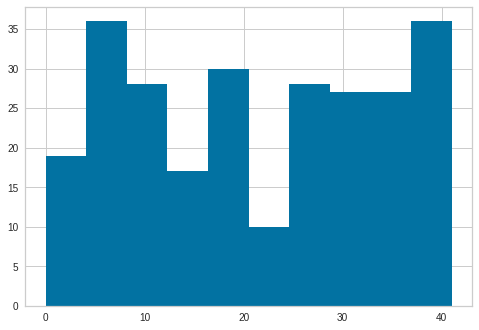

In [43]:
lst_a_hist = []
for i in lst_a:
  for j in i:
    lst_a_hist.append(j)
df_lst_a_hist = pd.DataFrame( lst_a_hist)
plt.hist(lst_a_hist)


In [44]:
df_lst_a_hist

,0
0,0
1,1
2,0
3,1
4,2
...,...
253,20
254,26
255,28
256,38


In [45]:
df_lst_a_hist[0].value_counts()

5     12
8     12
33    10
38    10
39    10
36    10
29    10
10    10
32     9
20     9
18     9
26     9
15     8
28     8
7      8
9      7
12     7
17     7
27     7
40     6
41     6
2      6
16     6
34     5
19     5
4      5
37     4
31     4
30     4
6      4
25     4
24     4
11     4
3      4
23     4
1      2
14     2
35     2
0      2
13     1
21     1
22     1
Name: 0, dtype: int64

Testando modelo árvore de decisão

In [46]:
x_train_modelagem

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,update_date,new_balance,highest_balance,...,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,0.636001,-0.192150,-0.149625,-0.132069,-0.108723,1.003712,0.527890,0.347977,-0.049478,-0.068431,...,1.051831,0.768049,0.119086,0.253322,-0.005416,1.337679,0.389701,0.879187,0.979306,2.142633
1,0.640756,2.729369,-0.149625,-0.132069,-0.106580,0.167869,-0.057963,-1.690361,-0.049478,0.061074,...,0.678867,0.768049,-0.532367,0.253322,-1.125016,0.026731,-0.815317,0.879187,-0.763123,-1.245917
2,0.632937,-0.192150,-0.149625,-0.132069,-0.108723,-0.082884,1.406669,0.639168,-0.036498,-0.050379,...,-1.434595,0.768049,-0.409630,0.253322,1.487383,-1.939691,-1.136655,0.879187,2.181161,0.588011
3,0.639998,-0.192150,-0.149625,-0.132069,-0.108723,1.505217,0.527890,-1.399170,-0.049478,-0.060318,...,1.393714,0.768049,0.355120,0.253322,-1.125016,1.337679,0.389701,0.879187,-0.763327,0.550792
4,-1.570865,-0.192150,-0.149625,-0.132069,-0.108723,0.752959,0.527890,0.347977,-0.047664,-0.066434,...,-0.253543,0.768049,-0.164155,-3.947537,1.487383,0.026731,0.791374,0.879187,-0.691254,0.287112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,0.639815,-0.192150,-0.149625,-0.132069,-0.108723,-1.253063,0.527890,-1.690361,-0.049478,-0.067191,...,-0.377864,0.768049,0.657244,0.253322,-0.751816,0.026731,-0.011971,-3.707305,-0.697250,1.351062
4888,0.634499,-0.192150,-0.149625,-0.132069,-0.108723,0.585790,0.527890,0.639168,-0.046673,-0.059634,...,-0.750828,-1.491979,-0.532367,0.253322,1.487383,1.337679,-1.698996,-1.414059,1.580017,0.287112
4889,0.633976,-0.192150,-0.149625,-0.132069,-0.108723,1.170880,-2.108447,0.347977,0.142709,0.148385,...,0.492385,0.768049,-0.060300,-3.947537,1.487383,0.026731,0.791374,0.879187,-0.691254,-1.245917
4890,0.640542,-0.192150,-0.149625,-0.132069,-0.108723,1.588802,-1.815520,0.056786,0.243992,0.193363,...,-0.812988,0.768049,-0.475719,0.253322,-1.125016,0.026731,0.952043,0.879187,-0.763153,0.575868


In [47]:
#OVD_t1
#OVD_t2
#OVD_sum
#fea_4
#fea_5
#pay_normal
#highest_balance

In [48]:
x_train,x_teste, y_train, y_teste = train_test_split(df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22]], df.iloc[:,11], test_size = 0.3, random_state=1)

In [49]:
x_train

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,update_date,new_balance,highest_balance,...,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
8077,54984058,0,0,0,0,36,10,2012.0,0.0,27621.0,...,1455.500000,3,35000.0,2,15,5,92,5,60058,1.000000
4605,59002170,0,0,0,0,18,6,2014.0,0.0,30000.0,...,1256.000000,3,141000.0,2,8,5,84,3,60031,223.606798
3595,58992602,0,0,0,0,28,10,2013.0,-2.4,4364.0,...,1368.500000,3,390000.0,2,11,5,101,5,60024,173.205081
5541,58991651,1,1,10,3864,0,5,2005.0,0.0,27500.0,...,1268.000000,3,107000.0,2,11,4,105,5,60091,1.000000
6036,54989125,11,6,0,675,15,10,2002.0,0.0,46059.0,...,1373.000000,3,369000.0,2,8,7,108,5,330005,350.592356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,58995231,0,0,0,0,35,5,2007.0,0.0,475500.0,...,1374.500000,1,400000.0,2,12,-1,104,5,60000,492.660126
6159,54985432,0,0,0,0,12,10,2014.0,35130.0,29775.0,...,1260.500000,3,115000.0,2,11,5,85,5,60084,1.000000
4760,54985215,0,0,0,0,8,10,2015.0,68991.6,62787.0,...,1206.500000,3,76000.0,2,11,5,108,4,72000,173.205081
292,58987276,0,0,0,0,0,5,2006.0,0.0,200500.0,...,1284.486311,3,50000.0,2,15,9,110,5,450080,194.935887


In [50]:
x_teste

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,update_date,new_balance,highest_balance,...,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
4207,54983561,0,0,0,0,6,6,2015.0,12900.0,22000.0,...,1284.486311,2,47000.0,2,15,5,112,4,510037,175.826619
5479,58991722,0,0,0,0,0,6,2014.0,0.0,13300.0,...,1308.500000,3,143000.0,2,11,5,100,3,151009,173.205081
5489,58989774,0,0,0,0,6,6,2015.0,25798.8,43500.0,...,1281.500000,1,80000.0,2,12,-1,111,5,60019,235.114866
1411,59004885,0,0,0,0,5,10,2013.0,82527.6,80721.0,...,1272.500000,1,141000.0,2,8,5,110,3,151300,1.000000
3274,54985730,0,0,0,0,2,10,2015.0,4140.0,11448.0,...,1319.000000,3,149000.0,2,11,9,112,5,350096,243.956963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,54986064,0,0,0,0,1,5,2015.0,283083.6,240500.0,...,1281.500000,1,173000.0,2,11,-1,106,5,72000,1.000000
1963,59002949,0,0,0,0,3,10,2015.0,33.6,13334.0,...,1314.500000,3,89000.0,2,8,5,111,4,151009,1.000000
1307,54984987,0,0,0,0,10,10,2014.0,0.0,94856.0,...,1296.500000,1,130000.0,2,15,5,110,3,361039,187.082869
1346,54992408,0,0,0,0,11,10,2013.0,-1192.8,59293.0,...,1314.500000,1,53000.0,2,8,5,103,5,151300,187.539329


In [51]:
x_train= x_train.loc[:,['OVD_t1','OVD_t2','OVD_sum','fea_1','fea_4','fea_5','pay_normal','highest_balance','report_date']].values

In [52]:
x_teste = x_teste.loc[:,['OVD_t1','OVD_t2','OVD_sum','fea_1','fea_4','fea_5','pay_normal','highest_balance','report_date']].values

Modelagem Randon Forest

In [53]:
obj_RandomForestClassifier = RandomForestClassifier(n_estimators=11,criterion='entropy')
obj_RandomForestClassifier.fit( x_train, y_train.values)
previsão = obj_RandomForestClassifier.predict( x_teste)
obj_RandomForestClassifier.score( x_train, y_train.values),  roc_auc_score(y_teste, previsão)

(0.991618969746525, 0.6306539288130646)

In [54]:
obj_RandomForestClassifier.score(x_teste, y_teste.values)

0.849308536003815

0.849308536003815

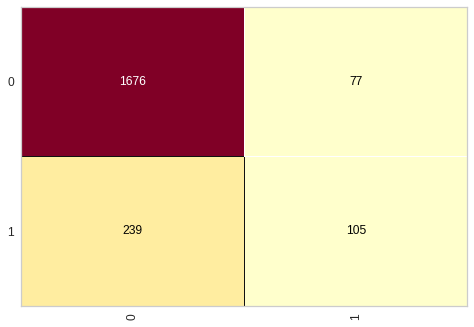

In [55]:
from yellowbrick.classifier import ConfusionMatrix
obj_ConfusionMatrix = ConfusionMatrix(obj_RandomForestClassifier)
obj_ConfusionMatrix.fit(x_train, y_train)
obj_ConfusionMatrix.score(x_teste, y_teste)

In [56]:
auc_score = roc_auc_score(y_teste, previsão)
auc_score

0.6306539288130646

Otimizando (maximização) a curva roc

-0.6036744318709455 0.9975470155355682
-0.6225971424402023 0.9983646770237122
-0.6055225924992371 0.9693376941946035
-0.6139309356717388 0.9963205233033524
-0.6109692354634579 0.9985690923957482
-0.6115670478515235 0.9944807849550286
-0.5741710224333038 0.9513491414554375
-0.6058078178272464 0.9854865085854456
-0.6106176786638188 0.9826246933769419
-0.6183187625200652 0.9987735077677842
|||||_____________________________________________ 10.0% GA is running...-0.613590986879635 0.9965249386753884
-0.6185492643839796 0.9975470155355682
-0.6328536462409956 0.9965249386753884
-0.6005916767269398 0.9746524938675388
-0.6074644463312063 0.9965249386753884
-0.6007948168588068 0.9975470155355682
||||||||||________________________________________ 20.0% GA is running...-0.6226245041722496 0.9955028618152085
-0.6127900343597023 0.9952984464431726
-0.6235349036203717 0.9975470155355682
-0.6322831955849774 0.9975470155355682
-0.6214836028602131 0.9975470155355682
-0.6267544674246144 0.99734260016353

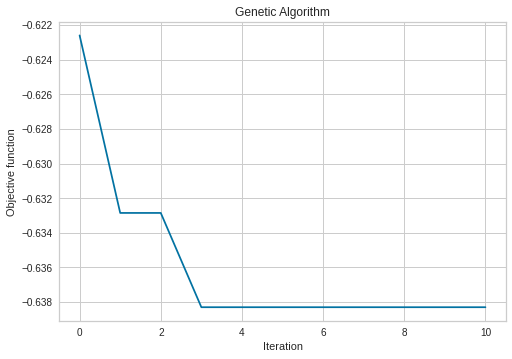

In [57]:
def f(x):
  pen = 0
  #x_train,x_teste, y_train, y_teste = train_test_split(df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22]], df.iloc[:,11], test_size = 0.5, random_state=1)
  #x_train= x_train.loc[:,['OVD_t1','OVD_t2','OVD_sum','fea_4','fea_5','pay_normal','highest_balance']].values
  #x_teste = x_teste.loc[:,['OVD_t1','OVD_t2','OVD_sum','fea_4','fea_5','pay_normal','highest_balance']].values
  criterion_lst = ['gini', 'entropy', 'log_loss']
  obj_RandomForestClassifier = RandomForestClassifier(n_estimators=int(x[0]),criterion= str(criterion_lst[int(x[1])])  )
  obj_RandomForestClassifier.fit( x_train, y_train.values)
  previsão = obj_RandomForestClassifier.predict(x_teste)
  auc_score = roc_auc_score(y_teste, previsão)
  d = obj_RandomForestClassifier.score(x_train, y_train.values)
  #if not  d <= 0.95: pen = np.inf
  print(-auc_score,obj_RandomForestClassifier.score( x_train, y_train.values))

  return(-auc_score) + pen
varbound = np.array([[1,35], [0,1]])
vartype = np.array([['int'],['int']])
algorithm_param = {'max_num_iteration': 10,
                   'population_size':10,
                   'mutation_probability': 0.1,
                   'mutation_discrete_probability': 0.1,
                   'elit_ratio': 0.01,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'crossover_probability': 0.1,
                   'mutation_type': 'uniform_by_center',
                   'mutation_discrete_type': 'uniform_discrete',
                   'selection_type': 'roulette',
                   'max_iteration_without_improv':100}
model = ga(function = f, dimension=2, variable_type_mixed=vartype,variable_boundaries=varbound, function_timeout = 20,  algorithm_parameters=algorithm_param)

model.run()

In [58]:

print(classification_report(y_teste, previsão))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1753
           1       0.58      0.31      0.40       344

    accuracy                           0.85      2097
   macro avg       0.73      0.63      0.66      2097
weighted avg       0.83      0.85      0.83      2097

